# [IAPR][iapr]: Project ‒  Coin classification


**Group ID:** 56

**Author 1 (sciper):** Shujiro Shobayashi (314853)  
**Author 2 (sciper):** Camille Pittet (326866)   
**Author 3 (sciper):** Renuka Singh Virk (326470) 

**Release date:** 26.04.2024  
**Due date:** 29.05.2024 (11:59 pm)


## Important notes

Each group must upload an archive by May 29th, 11:59 PM that includes:

1. A report of your work in Jupyter Notebook format. It should provide detailed explanations of your method along with the code for every step of the project. The Jupyter Notebook should be capable of generating the final submission you submitted on Kaggle when rerun.
2. A requirements.txt file listing all Python packages you used.
3. Any additional files that you used.
TAs should be able to rerun your code end to end without having any issues. If not, you might lose part of the points during grading.

Please name the archive file with the number of your team, e.g. Group28.zip.

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install scikit-image
!pip install pillow

In [2]:
# Check is at least python 3.9
import sys 
assert (sys.version_info.major == 3) and (sys.version_info.minor == 9)

In [3]:
# Import main packages
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from PIL import Image
from typing import Callable
import os
from datetime import datetime
import cv2

We start by loading all images. Images have format 6000px x 4000px x3 channels (R,G,B)

(-0.5, 5999.5, 3999.5, -0.5)

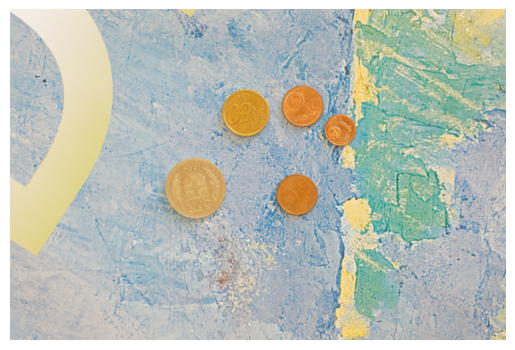

In [4]:
# Define path
path = os.path.join("iapr24-coin-counter", "train", "2. noisy_bg", "L1010325.JPG")

# Load image
img = np.array(Image.open(path))

# Binarize image => grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display image
plt.imshow(img)
plt.axis('off')

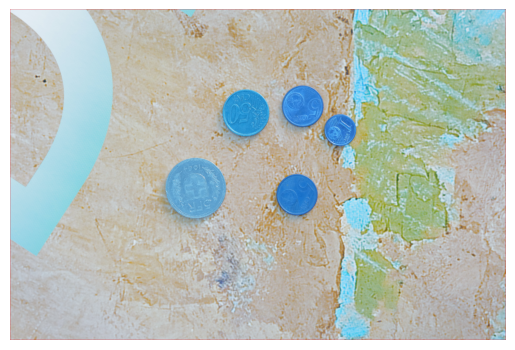

In [8]:
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original RGB image
contour_image_filled = np.zeros_like(img)
cv2.drawContours(contour_image_filled, contours, -1, (0, 0, 255), thickness=-1)

# Draw contours with only the borders in red
contour_image_borders = img.copy()
cv2.drawContours(contour_image_borders, contours, -1, (0, 0, 255), thickness=2)

# Convert BGR to RGB
contour_image_borders_rgb = cv2.cvtColor(contour_image_borders, cv2.COLOR_BGR2RGB)

# Plot the image with contours
plt.imshow(contour_image_borders_rgb)
plt.axis('off')  # Optional: Turn off axis
plt.show()

In [9]:
from skimage.measure import find_contours
import cv2
def find_contour(images: np.ndarray):
    """
    Find the contours for the set of images
    
    Args
    ----
    images: np.ndarray (N, 28, 28)
        Source images to process

    Return
    ------
    contours: list of np.ndarray
        List of N arrays containing the coordinates of the contour. Each element of the 
        list is an array of 2d coordinates (K, 2) where K depends on the number of elements 
        that form the contour. 
    """

    # Get number of images to process
    N, _, _ = np.shape(images)
    print(N, ' images to process')
    # Fill in dummy values (fake points)
    contours = [np.array([[0, 0], [1, 1]]) for i in range(N)]

    # ------------------
    for i in range(N):
        contours[i] = find_contours(images[i], 0.5)[0]
        contours[i] = cv2.flip(cv2.rotate(contours[i], cv2.ROTATE_180),0)        
    # ------------------
    
    return contours
    

In [10]:
contour = find_contour(img)

4000  images to process


IndexError: list index out of range

---
# Feature extraction

---
# Classification